In [1]:
from mylib.statistic_test import *

code_id = "0876 - Decision Points Instinct Tendency"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

f_behav = pd.read_excel(join(loc, "first_session_behavior.xlsx"))



d:\Software\Anaconda3\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\Dsp\0876 - Decision Points Instinct Tendency is already existed!


        D:\Data\FinalResults\Dsp\0876 - Decision Points Instinct Tendency\Exception_Visualization is already existed!


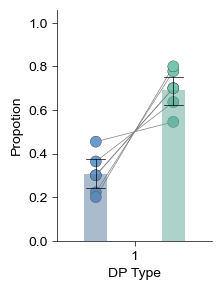

DP Type 1: TtestResult(statistic=-5.063138129048042, pvalue=0.0038896352792183743, df=5)


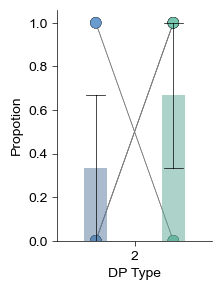

DP Type 2: TtestResult(statistic=-0.7905694150420948, pvalue=0.465022638260757, df=5)


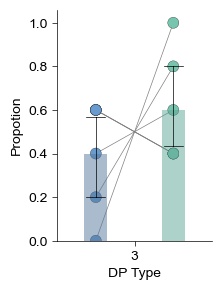

DP Type 3: TtestResult(statistic=-0.9682458365518544, pvalue=0.37739122094954614, df=5)


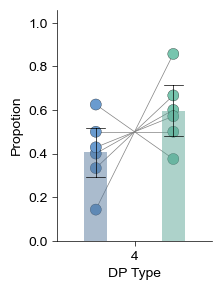

DP Type 4: TtestResult(statistic=-1.4335343194398589, pvalue=0.2111537698654807, df=5)


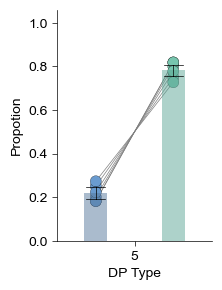

DP Type 5: TtestResult(statistic=-18.482463797910864, pvalue=8.530579912045325e-06, df=5)


In [4]:
save_dir = join(loc, "Exception_Visualization")
mkdir(save_dir)

def visualize_exceptions(bins, maze_type, mouse, test_id, save_dir=save_dir):
    fig = plt.figure(figsize=(4, 4))
    ax = Clear_Axes(plt.axes())
    DrawMazeProfile(axes=ax, nx=12, maze_type=maze_type, linewidth=0.5, color='k')
    for i in range(len(bins)-1):
        x_beg = (bins[i]-1)%12
        x_end = (bins[i+1]-1)%12
        y_beg = (bins[i]-1)//12
        y_end = (bins[i+1]-1)//12
        ax.plot([x_beg, x_end], [y_beg, y_end], color='r', lw=0.5)
    ax.set_title(f"{mouse} M {maze_type} - #{test_id}", fontsize=8)
    ax.invert_yaxis()
    plt.savefig(join(save_dir, f"{mouse}_M{maze_type}_#{test_id}_exceptions.png"), dpi=300)
    plt.close()

def get_data(trace):
    behav_nodes = np.concatenate([[0, 1], spike_nodes_transform(trace['correct_nodes'], nx=12)])
    dnodes = np.where(np.diff(behav_nodes) == 0)[0] + 1
    uniq_nodes = np.delete(behav_nodes, dnodes)
    
    maze_type = int(trace['maze_type'])
    mouse = int(trace['MiceID'])
    
    if maze_type == 1:
        DP = DPs[1][1:]
        targ = {
            (0, 13): {25: (4, "L-Turn", False), 14: (4, "Z-Turn", True)},
            (2, 13): {25: (5, "L-Turn", False), 14: (5, "U-Turn", True)},
            (4, 6): {7: (1, "Straight", False), 18: (1, "Turn", True)},
            (6, 17): {16: (4, "L-Turn", False), 29: (4, "Z-Turn", True)},
            (17, 30): {31: (4, "L-Turn", True), 42: (4, "Z-Turn", False)},
            (11, 24): {23: (5, "U-Turn", True), 36: (5, "L-Turn", False)},
            (71, 84): {83: (5, "U-Turn", True), 96: (5, "L-Turn", False)},
            (83, 94): {82: (3, "U-Turn", True), 106: (3, "Z-Turn", False)},
            (79, 55): {54: (1, "Turn", True), 43: (1, "Straight", False)},
            (67, 54): {66: (5, "U-Turn", True), 53: (5, "L-Turn", False)},
            (43, 54): {66: (4, "Z-Turn", True), 53: (4, "L-Turn", False)},
            (62, 51): {52: (4, "L-Turn", False), 39: (4, "Z-Turn", True)},
            (50, 39): {38: (3, "U-Turn", True), 40: (3, "Z-Turn", False)},
            (52, 39): {38: (3, "Z-Turn", True), 40: (3, "U-Turn", False)},
            (73, 97): {98: (1, "Turn", False), 109: (1, "Straight", True)},
            (85, 109): {110: (1, "Turn", True), 121: (1, "Straight", False)},
            (98, 109): {110: (5, "U-Turn", True), 121: (5, "L-Turn", False)},
            (116, 129): {128: (5, "U-Turn", False), 141: (5, "L-Turn", True)},
            (129, 142): {143: (5, "L-Turn", False), 130: (5, "U-Turn", True)},
            (141, 130): {131: (4, "Z-Turn", True), 118: (4, "L-Turn", False)},
            (143, 130): {131: (5, "U-Turn", True), 118: (5, "L-Turn", False)}
        }  
    elif maze_type == 2:
        DP = np.concatenate((DPs[2][:-1], [51, 50]))
        targ = {
            (0, 2): {3: (1, "Straight", False), 14: (1, "Turn", True)},
            (73, 86): {87: (3, "Z-Turn", False), 85: (3, "U-Turn", True)},
            (97, 110): {122: (5, "L-Turn", False), 109: (5, "U-Turn", True)},
            (133, 135): {136: (1, "Straight", False), 123: (1, "Turn", True)},
            (64, 53): {52: (5, "U-Turn", True), 41: (5, "L-Turn", False)},
            (65, 52): {51: (4, "L-Turn", False), 40: (4, "Z-Turn", True)},
            (41, 52): {51: (5, "L-Turn", False), 40: (5, "U-Turn", True)},
            (53, 51): {50: (1, "Straight", False), 39: (1, "Turn", False)},
            (40, 51): {50: (5, "L-Turn", False), 39: (5, "U-Turn", False)},
            (52, 50): {62: (2, "Left-Turn", False), 38: (2, "Right-Turn", False)},
            (5, 7): {8: (1, "Straight", False), 19: (1, "Turn", True)},
            (31, 44): {56: (3, "Z-Turn", False), 32: (3, "U-Turn", True)},
            (11, 24): {36: (5, "L-Turn", False), 23: (5, "U-Turn", True)},
            (54, 78): {90: (1, "Straight", False), 77: (1, "Turn", True)},
            (92, 105): {117: (4, "L-Turn", False), 106: (4, "Z-Turn", True)},
            (106, 82): {81: (1, "Turn", False), 70: (1, "Straight", True)},
            (94, 70): {58: (1, "Straight", False), 71: (1, "Turn", True)},
            (81, 70): {58: (4, "L-Turn", False), 71: (4, "Z-Turn", True)},
            (71, 60): {48: (3, "Z-Turn", False), 72: (3, "U-Turn", True)},
            (84, 95): {96: (5, "U-Turn", True), 107: (5, "L-Turn", False)},
            (108, 119): {118: (4, "L-Turn", False), 131: (4, "Z-Turn", True)}
        }  
    else:
        raise ValueError("Unknown maze type.")
    
    res = {
        "Test ID": [],
        "MiceID": [],
        "Maze Type": [],
        "Desition Point": [],
        "Accuracy": [],
        "DP Type": [],
        "Move Type": []
    }
    
    for i, dp in enumerate(DP):
        idx = np.where(uniq_nodes == dp)[0]
        if len(idx) == 0:
            continue
        
        idx_ = idx[0]
        prev_nodes = []
        for j in range(idx_-1, -1, -1):
            if uniq_nodes[j] not in prev_nodes and uniq_nodes[j] != dp:
                prev_nodes.append(uniq_nodes[j])
            if len(prev_nodes) >= 2:
                break
        
        next_nodes = []
        for j in range(idx_+1, len(uniq_nodes)):
            if uniq_nodes[j] not in next_nodes and uniq_nodes[j] not in prev_nodes and uniq_nodes[j] != dp:
                next_nodes.append(uniq_nodes[j])
            if len(next_nodes) >= 1:
                break
            
        prev = np.array(prev_nodes)[-1]
        next_ = next_nodes[0]
        if (prev, dp) in targ.keys():
            if next_ in targ[(prev, dp)].keys():
                dp_type, move_type, is_correct = targ[(prev, dp)][next_]
                res["MiceID"].append(mouse)
                res["Maze Type"].append(maze_type)
                res["Desition Point"].append(dp)
                res["Accuracy"].append(is_correct)
                res["DP Type"].append(dp_type)
                res["Move Type"].append(move_type)
                res["Test ID"].append(i)
            else:
                print(prev_nodes[-1], prev_nodes[0], dp, next_, uniq_nodes[idx_-10:idx_+10])
                visualize_exceptions(uniq_nodes[idx_-2:idx_+2], maze_type, mouse, i)
                res['MiceID'].append(mouse)
                res['Maze Type'].append(maze_type)
                res['Desition Point'].append(dp)
                res['Accuracy'].append(np.nan)
                res['DP Type'].append(np.nan)
                res['Move Type'].append(np.nan)
                res['Test ID'].append(i)
        else:
            print(prev_nodes[-1], prev_nodes[0], dp, next_, uniq_nodes[idx_-10:idx_+10])
            visualize_exceptions(uniq_nodes[idx_-2:idx_+2], maze_type, mouse, i)
            res['MiceID'].append(mouse)
            res['Maze Type'].append(maze_type)
            res['Desition Point'].append(dp)
            res['Accuracy'].append(np.nan)
            res['DP Type'].append(np.nan)
            res['Move Type'].append(np.nan)
            res['Test ID'].append(i)    
            
    for key in res.keys():
        res[key] = np.array(res[key])
    return res

if exists(join(figdata, f"{code_id} [Instinct Movement].pkl")) == False:
    Tendency = {
        "MiceID": [],
        "Maze Type": [],
        "Desition Point": [],
        "Accuracy": [],
        "DP Type": [],
        "Move Type": []
    }
    
    for i in range(len(f_behav)):
        print(f"{f_behav['MiceID'][i]} - M{f_behav['maze_type'][i]}")
        with open(f_behav['Trace File'][i], 'rb') as f:
            trace = pickle.load(f)
        
        res = get_data(trace)
        for key in Tendency.keys():
            Tendency[key].append(res[key])
            
    for key in Tendency.keys():
        Tendency[key] = np.concatenate(Tendency[key])
        
    TendencyD = pd.DataFrame(Tendency)
    with open(join(figdata, f"{code_id} [Instinct Movement].pkl"), 'wb') as f:
        pickle.dump(Tendency, f)
        
    TendencyD.to_excel(join(figdata, f"{code_id} [Instinct Movement].xlsx"), index=False)
else:
    TendencyD = pd.read_excel(join(figdata, f"{code_id} [Instinct Movement]m.xlsx"))
    
    Tendency = {}
    for key in TendencyD.columns:
        Tendency[key] = np.asarray(TendencyD[key].values)

if exists(join(figdata, f"{code_id} [Mouse Avg Instinct Tendency].pkl")) == False:
    MouseAvgData = {
        "MiceID": [],
        "DP Type": [],
        "Move Type": [],
        "Propotion": []
    }
    move_tps = {
        1: ("Turn", "Straight"),
        2: ("Left-Turn", "Right-Turn"),
        3: ("U-Turn", "Z-Turn"),
        4: ("L-Turn", "Z-Turn"),
        5: ("U-Turn", "L-Turn")
    }
    for mouse in np.unique(Tendency['MiceID']):
        for dp_type in np.unique(Tendency['DP Type']):
            total_idx = np.where((Tendency['MiceID'] == mouse) & (Tendency['DP Type'] == dp_type))[0]
            for move_type in move_tps[dp_type]:
                idx = np.where((Tendency['MiceID'] == mouse) & (Tendency['DP Type'] == dp_type) & (Tendency['Move Type'] == move_type))[0]
                prop = idx.shape[0] / (total_idx.shape[0] + 1e-9)
                MouseAvgData['MiceID'].append(mouse)
                MouseAvgData['DP Type'].append(dp_type)
                MouseAvgData['Move Type'].append(move_type)
                MouseAvgData['Propotion'].append(prop)
                
    for key in MouseAvgData.keys():
        MouseAvgData[key] = np.array(MouseAvgData[key])
        
    with open(join(figdata, f"{code_id} [Mouse Avg Instinct Tendency].pkl"), 'wb') as f:
        pickle.dump(MouseAvgData, f)
else:
    with open(join(figdata, f"{code_id} [Mouse Avg Instinct Tendency].pkl"), 'rb') as f:
        MouseAvgData = pickle.load(f)

for dp_type in range(5):
    subdata = SubDict(MouseAvgData, MouseAvgData.keys(), np.where(np.array(MouseAvgData['DP Type']) == dp_type+1)[0])
    fig = plt.figure(figsize=(2, 3))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
    sns.stripplot(
        x="DP Type",
        y="Propotion",
        hue="Move Type",
        data=subdata,
        jitter=0,
        palette=['#6a9bcf', '#77c5ae'],
        hue_order=move_tps[dp_type+1],
        size=8,
        edgecolor='k',
        linewidth=0.2,
        ax=ax, 
        dodge=True,
        legend=False, 
        zorder=1
    )
    sns.barplot(
        x="DP Type",
        y="Propotion",
        hue="Move Type",
        data=subdata,
        palette=['#4a78a8', '#4fb39d'],
        hue_order=move_tps[dp_type+1],
        alpha=0.5,
        capsize=0.2,
        err_kws={'linewidth': 0.5, 'color': 'k'},
        gap=0.7,
        ax=ax,
        dodge=True,
        legend=False,
        zorder=2
    )
    idx_A = np.where((np.array(subdata['Move Type']) == move_tps[dp_type+1][0]))[0]
    idx_B = np.where((np.array(subdata['Move Type']) == move_tps[dp_type+1][1]))[0]
    for i in range(len(idx_A)):
        ax.plot(
            [0 - 0.2, 0 + 0.2],
            [subdata['Propotion'][idx_A[i]], subdata['Propotion'][idx_B[i]]],
            color='gray',
            lw=0.5,
            zorder=0
        )
    ax.set_xlim(-0.4, 0.4)
    ax.set_ylim(0, 1.06)
    ax.set_yticks(np.linspace(0, 1, 6))
    plt.savefig(join(loc, f"DP Type-{dp_type+1}.png"), dpi=600)
    plt.savefig(join(loc, f"DP Type-{dp_type+1}.svg"), dpi=600)
    plt.show()
    print(f"DP Type {dp_type+1}: {ttest_rel(np.array(subdata['Propotion'])[idx_A], np.array(subdata['Propotion'])[idx_B])}")
    

# Decision Rate

In [ ]:
def get_data2(trace):
    behav_nodes = np.concatenate([[0, 1], spike_nodes_transform(trace['correct_nodes'], nx=12)])
    dnodes = np.where(np.diff(behav_nodes) == 0)[0] + 1
    uniq_nodes = np.delete(behav_nodes, dnodes)
    beg, end = LapSplit(trace, "CrossMaze")
    
    maze_type = int(trace['maze_type'])
    mouse = int(trace['MiceID'])
    
    if maze_type == 1:
        DP = DPs[1][1:]
        targ = {
            (0, 13): {25: (4, "L-Turn", False), 14: (4, "Z-Turn", True)},
            (2, 13): {25: (5, "L-Turn", False), 14: (5, "U-Turn", True)},
            (4, 6): {7: (1, "Straight", False), 18: (1, "Turn", True)},
            (6, 17): {16: (4, "L-Turn", False), 29: (4, "Z-Turn", True)},
            (17, 30): {31: (4, "L-Turn", True), 42: (4, "Z-Turn", False)},
            (11, 24): {23: (5, "U-Turn", True), 36: (5, "L-Turn", False)},
            (71, 84): {83: (5, "U-Turn", True), 96: (5, "L-Turn", False)},
            (83, 94): {82: (3, "U-Turn", True), 106: (3, "Z-Turn", False)},
            (79, 55): {54: (1, "Turn", True), 43: (1, "Straight", False)},
            (67, 54): {66: (5, "U-Turn", True), 53: (5, "L-Turn", False)},
            (43, 54): {66: (4, "Z-Turn", True), 53: (4, "L-Turn", False)},
            (62, 51): {52: (4, "L-Turn", False), 39: (4, "Z-Turn", True)},
            (50, 39): {38: (3, "U-Turn", True), 40: (3, "Z-Turn", False)},
            (52, 39): {38: (3, "Z-Turn", True), 40: (3, "U-Turn", False)},
            (73, 97): {98: (1, "Turn", False), 109: (1, "Straight", True)},
            (85, 109): {110: (1, "Turn", True), 121: (1, "Straight", False)},
            (98, 109): {110: (5, "U-Turn", True), 121: (5, "L-Turn", False)},
            (116, 129): {128: (5, "U-Turn", False), 141: (5, "L-Turn", True)},
            (129, 142): {143: (5, "L-Turn", False), 130: (5, "U-Turn", True)},
            (141, 130): {131: (4, "Z-Turn", True), 118: (4, "L-Turn", False)},
            (143, 130): {131: (5, "U-Turn", True), 118: (5, "L-Turn", False)}
        }  
    elif maze_type == 2:
        DP = np.concatenate((DPs[2][:-1], [51, 50]))
        targ = {
            (0, 2): {3: (1, "Straight", False), 14: (1, "Turn", True)},
            (73, 86): {87: (3, "Z-Turn", False), 85: (3, "U-Turn", True)},
            (97, 110): {122: (5, "L-Turn", False), 109: (5, "U-Turn", True)},
            (133, 135): {136: (1, "Straight", False), 123: (1, "Turn", True)},
            (64, 53): {52: (5, "U-Turn", True), 41: (5, "L-Turn", False)},
            (65, 52): {51: (4, "L-Turn", False), 40: (4, "Z-Turn", True)},
            (41, 52): {51: (5, "L-Turn", False), 40: (5, "U-Turn", True)},
            (53, 51): {50: (1, "Straight", False), 39: (1, "Turn", False)},
            (40, 51): {50: (5, "L-Turn", False), 39: (5, "U-Turn", False)},
            (52, 50): {62: (2, "Left-Turn", False), 38: (2, "Right-Turn", False)},
            (5, 7): {8: (1, "Straight", False), 19: (1, "Turn", True)},
            (31, 44): {56: (3, "Z-Turn", False), 32: (3, "U-Turn", True)},
            (11, 24): {36: (5, "L-Turn", False), 23: (5, "U-Turn", True)},
            (54, 78): {90: (1, "Straight", False), 77: (1, "Turn", True)},
            (92, 105): {117: (4, "L-Turn", False), 106: (4, "Z-Turn", True)},
            (106, 82): {81: (1, "Turn", False), 70: (1, "Straight", True)},
            (94, 70): {58: (1, "Straight", False), 71: (1, "Turn", True)},
            (81, 70): {58: (4, "L-Turn", False), 71: (4, "Z-Turn", True)},
            (71, 60): {48: (3, "Z-Turn", False), 72: (3, "U-Turn", True)},
            (84, 95): {96: (5, "U-Turn", True), 107: (5, "L-Turn", False)},
            (108, 119): {118: (4, "L-Turn", False), 131: (4, "Z-Turn", True)}
        }  
    else:
        raise ValueError("Unknown maze type.")
    
    res = {
        "Test ID": [],
        "MiceID": [],
        "Maze Type": [],
        "Desition Point": [],
        "Accuracy": [],
        "DP Type": [],
        "Move Type": []
    }
    
    for i, dp in enumerate(DP):
        idx = np.where(uniq_nodes == dp)[0]
        if len(idx) == 0:
            continue
        
        idx_ = idx[0]
        prev_nodes = []
        for j in range(idx_-1, -1, -1):
            if uniq_nodes[j] not in prev_nodes and uniq_nodes[j] != dp:
                prev_nodes.append(uniq_nodes[j])
            if len(prev_nodes) >= 2:
                break
        
        next_nodes = []
        for j in range(idx_+1, len(uniq_nodes)):
            if uniq_nodes[j] not in next_nodes and uniq_nodes[j] not in prev_nodes and uniq_nodes[j] != dp:
                next_nodes.append(uniq_nodes[j])
            if len(next_nodes) >= 1:
                break
            
        prev = np.array(prev_nodes)[-1]
        next_ = next_nodes[0]
        if (prev, dp) in targ.keys():
            if next_ in targ[(prev, dp)].keys():
                dp_type, move_type, is_correct = targ[(prev, dp)][next_]
                res["MiceID"].append(mouse)
                res["Maze Type"].append(maze_type)
                res["Desition Point"].append(dp)
                res["Accuracy"].append(is_correct)
                res["DP Type"].append(dp_type)
                res["Move Type"].append(move_type)
                res["Test ID"].append(i)
            else:
                print(prev_nodes[-1], prev_nodes[0], dp, next_, uniq_nodes[idx_-10:idx_+10])
                visualize_exceptions(uniq_nodes[idx_-2:idx_+2], maze_type, mouse, i)
                res['MiceID'].append(mouse)
                res['Maze Type'].append(maze_type)
                res['Desition Point'].append(dp)
                res['Accuracy'].append(np.nan)
                res['DP Type'].append(np.nan)
                res['Move Type'].append(np.nan)
                res['Test ID'].append(i)
        else:
            print(prev_nodes[-1], prev_nodes[0], dp, next_, uniq_nodes[idx_-10:idx_+10])
            visualize_exceptions(uniq_nodes[idx_-2:idx_+2], maze_type, mouse, i)
            res['MiceID'].append(mouse)
            res['Maze Type'].append(maze_type)
            res['Desition Point'].append(dp)
            res['Accuracy'].append(np.nan)
            res['DP Type'].append(np.nan)
            res['Move Type'].append(np.nan)
            res['Test ID'].append(i)    
            
    for key in res.keys():
        res[key] = np.array(res[key])
    return res

if exists(join(figdata, f"{code_id} [Instinct Movement].pkl")) == False:
    Tendency = {
        "MiceID": [],
        "Maze Type": [],
        "Desition Point": [],
        "Accuracy": [],
        "DP Type": [],
        "Move Type": []
    }
    
    for i in range(len(f_behav)):
        print(f"{f_behav['MiceID'][i]} - M{f_behav['maze_type'][i]}")
        with open(f_behav['Trace File'][i], 'rb') as f:
            trace = pickle.load(f)
        
        res = get_data(trace)
        for key in Tendency.keys():
            Tendency[key].append(res[key])
            
    for key in Tendency.keys():
        Tendency[key] = np.concatenate(Tendency[key])
        
    TendencyD = pd.DataFrame(Tendency)
    with open(join(figdata, f"{code_id} [Instinct Movement].pkl"), 'wb') as f:
        pickle.dump(Tendency, f)
        
    TendencyD.to_excel(join(figdata, f"{code_id} [Instinct Movement].xlsx"), index=False)
else:
    TendencyD = pd.read_excel(join(figdata, f"{code_id} [Instinct Movement]m.xlsx"))
    
    Tendency = {}
    for key in TendencyD.columns:
        Tendency[key] = np.asarray(TendencyD[key].values)

if exists(join(figdata, f"{code_id} [Mouse Avg Instinct Tendency].pkl")) == False:
    MouseAvgData = {
        "MiceID": [],
        "DP Type": [],
        "Move Type": [],
        "Propotion": []
    }
    move_tps = {
        1: ("Turn", "Straight"),
        2: ("Left-Turn", "Right-Turn"),
        3: ("U-Turn", "Z-Turn"),
        4: ("L-Turn", "Z-Turn"),
        5: ("U-Turn", "L-Turn")
    }
    for mouse in np.unique(Tendency['MiceID']):
        for dp_type in np.unique(Tendency['DP Type']):
            total_idx = np.where((Tendency['MiceID'] == mouse) & (Tendency['DP Type'] == dp_type))[0]
            for move_type in move_tps[dp_type]:
                idx = np.where((Tendency['MiceID'] == mouse) & (Tendency['DP Type'] == dp_type) & (Tendency['Move Type'] == move_type))[0]
                prop = idx.shape[0] / (total_idx.shape[0] + 1e-9)
                MouseAvgData['MiceID'].append(mouse)
                MouseAvgData['DP Type'].append(dp_type)
                MouseAvgData['Move Type'].append(move_type)
                MouseAvgData['Propotion'].append(prop)
                
    for key in MouseAvgData.keys():
        MouseAvgData[key] = np.array(MouseAvgData[key])
        
    with open(join(figdata, f"{code_id} [Mouse Avg Instinct Tendency].pkl"), 'wb') as f:
        pickle.dump(MouseAvgData, f)
else:
    with open(join(figdata, f"{code_id} [Mouse Avg Instinct Tendency].pkl"), 'rb') as f:
        MouseAvgData = pickle.load(f)

for dp_type in range(5):
    subdata = SubDict(MouseAvgData, MouseAvgData.keys(), np.where(np.array(MouseAvgData['DP Type']) == dp_type+1)[0])
    fig = plt.figure(figsize=(2, 3))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
    sns.stripplot(
        x="DP Type",
        y="Propotion",
        hue="Move Type",
        data=subdata,
        jitter=0,
        palette=['#6a9bcf', '#77c5ae'],
        hue_order=move_tps[dp_type+1],
        size=8,
        edgecolor='k',
        linewidth=0.2,
        ax=ax, 
        dodge=True,
        legend=False, 
        zorder=1
    )
    sns.barplot(
        x="DP Type",
        y="Propotion",
        hue="Move Type",
        data=subdata,
        palette=['#4a78a8', '#4fb39d'],
        hue_order=move_tps[dp_type+1],
        alpha=0.5,
        capsize=0.2,
        err_kws={'linewidth': 0.5, 'color': 'k'},
        gap=0.7,
        ax=ax,
        dodge=True,
        legend=False,
        zorder=2
    )
    idx_A = np.where((np.array(subdata['Move Type']) == move_tps[dp_type+1][0]))[0]
    idx_B = np.where((np.array(subdata['Move Type']) == move_tps[dp_type+1][1]))[0]
    for i in range(len(idx_A)):
        ax.plot(
            [0 - 0.2, 0 + 0.2],
            [subdata['Propotion'][idx_A[i]], subdata['Propotion'][idx_B[i]]],
            color='gray',
            lw=0.5,
            zorder=0
        )
    ax.set_xlim(-0.4, 0.4)
    ax.set_ylim(0, 1.06)
    ax.set_yticks(np.linspace(0, 1, 6))
    plt.savefig(join(loc, f"DP Type-{dp_type+1}.png"), dpi=600)
    plt.savefig(join(loc, f"DP Type-{dp_type+1}.svg"), dpi=600)
    plt.show()
    print(f"DP Type {dp_type+1}: {ttest_rel(np.array(subdata['Propotion'])[idx_A], np.array(subdata['Propotion'])[idx_B])}")
    